# Prediction santander customer satisfaction
- The task is to predict the probability that each customer in the test set is an unsatisfied customer.
- evaluation metric : roc-auc-score

## Data preprocessing

In [2]:
dataset = pd.read_csv('./../input/santander-customer-satisfaction/train.csv')
print('train data : {}'.format(dataset.shape))
dataset.head(3)

train data : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
# 111 features float , 260 feartures int
print(dataset.info());print('='*50)

# target distribution 확인 불만족 고객의 비율은 0.03%
print(dataset['TARGET'].value_counts());print('='*50)
ratio = sum(dataset['TARGET']==1)/len(dataset['TARGET'])
print('unsatisfied customer ratio : {0:.2f}'.format(ratio))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB
None
0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied customer ratio : 0.04


In [4]:
# var3 feature의 경우 min = -999999.000000 이다. -999999.000000값은 다른값과 너무 편차가 심하므로 median으로 값을 변환진행
dataset.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print('이상치 수 : ', sum(dataset['var3']==-999999.000000))
dataset['var3'].replace(-999999.000000,2,inplace=True)
# ID 열은 단순 식별자이므로 제거해준다.
dataset.drop('ID',axis=1,inplace=True)
dataset.describe()

이상치 수 :  116


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


## train dataset, test dataset split

In [6]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

X_features = dataset.iloc[:,:-1]
y_labels = dataset.iloc[:,-1]
print('X_features : {}, y_label : {}'.format(X_features.shape, y_labels.shape));print('='*50)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,test_size=0.2)
print('X_train {}, X_test {}, y_train {}, y_test {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape));print('='*50)

# target=1인 경우 비율 확인
print('train dataset 내에 target=1인 비율: {0:.2f}'.format(sum(y_train==1)/y_train.count()))
print('test dataset 내에 target=1인 비율: {0:.2f}'.format(sum(y_test==1)/y_test.count()))


X_features : (76020, 369), y_label : (76020,)
X_train (60816, 369), X_test (15204, 369), y_train (60816,), y_test (15204,)
train dataset 내에 target=1인 비율: 0.04
test dataset 내에 target=1인 비율: 0.04


## XGBoost 
-최적 파라미터로 학습 후 예측한 roc auc 값: 0.841

In [7]:
# 모델 생성
xgb_clf = XGBClassifier(n_estimators=500)

# 학습 (evaluation metric : auc / 조기중단 값 100)
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)], verbose=False)

# 예측
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('테스트 데이터세트로 예측 시 ROC AUC 값 : {0:.3f}'.format(xgb_roc_score));print('='*50)

# GridSearchCV를 이용한 hyperparameter turning (수행시간을 줄이기 위해 n_estimators : 100으로 두자)
xgb_clf = XGBClassifier(n_estimators=100)
params = {
    'max_depth' : [5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]
}
grid_clf = GridSearchCV(xgb_clf,param_grid = params, cv=3)
# 학습
grid_clf.fit(X_train, y_train, early_stopping_rounds=30,eval_metric='auc', eval_set=[(X_train,y_train),(X_test,y_test)], verbose=False)
# 예측
xgb_roc_score = roc_auc_score(y_test, grid_clf.predict_proba(X_test)[:,1], average='macro')
print('GridSearchCV 최적 파라미터',grid_clf.best_params_)
print('테스트 데이터세트로 예측 시 ROC AUC 값 : {0:.3f}'.format(xgb_roc_score));print('='*50)


테스트 데이터세트로 예측 시 ROC AUC 값 : 0.835
GridSearchCV 최적 파라미터 {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
테스트 데이터세트로 예측 시 ROC AUC 값 : 0.842


In [8]:
# n_estimators를 1000으로 지정하고 learning_rate : 0.02 reg_alpha = 0.03으로 지정
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate=0.02, reg_alpha=0.03,max_depth=5,min_child_weight=3,colsample_bytree=0.5)

# 학습
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc',eval_set=[(X_train,y_train),(X_test,y_test)])
# 예측
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('최적 파라미터로 학습 후 예측한 roc auc 값: {0:.3f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.81623	validation_1-auc:0.81117
[1]	validation_0-auc:0.81441	validation_1-auc:0.79970
[2]	validation_0-auc:0.82501	validation_1-auc:0.80834
[3]	validation_0-auc:0.82852	validation_1-auc:0.81180
[4]	validation_0-auc:0.82831	validation_1-auc:0.81322
[5]	validation_0-auc:0.82777	validation_1-auc:0.81410
[6]	validation_0-auc:0.82653	validation_1-auc:0.81240
[7]	validation_0-auc:0.82723	validation_1-auc:0.81321
[8]	validation_0-auc:0.82807	validation_1-auc:0.81485
[9]	validation_0-auc:0.82813	validation_1-auc:0.81438
[10]	validation_0-auc:0.82765	validation_1-auc:0.81375
[11]	validation_0-auc:0.82889	validation_1-auc:0.81475
[12]	validation_0-auc:0.83058	validation_1-auc:0.81615
[13]	validation_0-auc:0.83062	validation_1-auc:0.81573
[14]	validation_0-auc:0.83174	validation_1-auc:0.81783
[15]	validation_0-auc:0.83095	validation_1-auc:0.81735
[16]	validation_0-auc:0.82954	validation_1-auc:0.81573
[17]	validation_0-auc:0.82860	validation_1-auc:0.81501
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

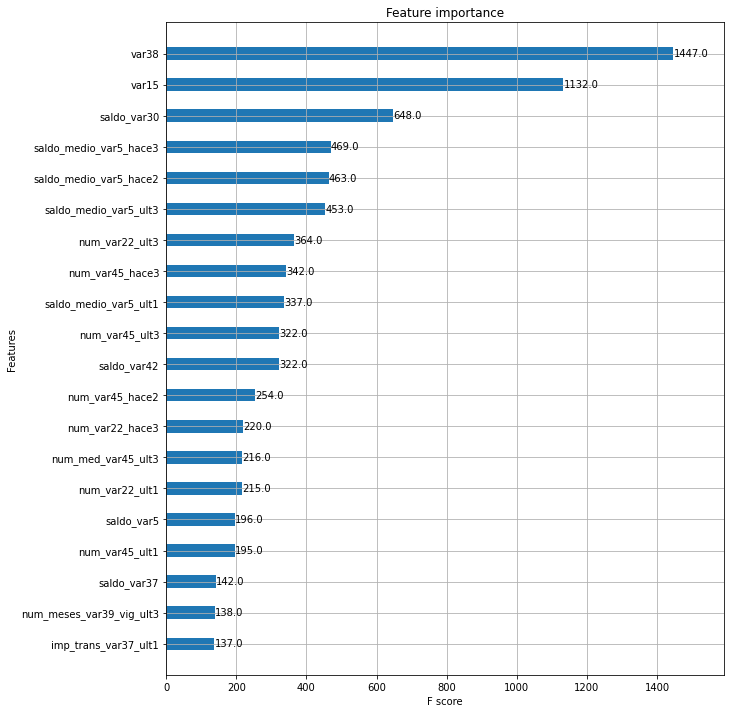

In [9]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig,ax = plt.subplots(1,1, figsize=(10,12))
plot_importance(xgb_clf,ax=ax, max_num_features=20, height=0.4)

## LightGBM
-최적 파라미터로 학습 후 예측한 roc auc 값: 0.8351

In [10]:
from lightgbm import LGBMClassifier

# 모델 생성
lgbm_clf = LGBMClassifier(n_estimators=500)
evals=[(X_test,y_test)]
# 학습
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose = False)
# 예측
lgbm_roc_score = roc_auc_score(y_test,lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('LightGBM 수행결과 ROC AUC : {0:.4f}'.format(lgbm_roc_score));print('='*50)

# GridSearchCV를 이용한 hyperparameter turning (수행시간을 줄이기 위해 n_estimators : 100으로 두자)lgbm_clf = LGBMClassifier(n_estimators=100)
lgbm_clf = LGBMClassifier(n_estimators=200)
params ={
    'num_leaves':[32,64],'max_depth':[128,600], 'min_child_samples':[60,100], 'subsample':[0.8,1]
}
grid_lgbm = GridSearchCV(lgbm_clf,param_grid=params, cv=3)
# 학습
grid_lgbm.fit(X_train,y_train,early_stopping_rounds=30,eval_metric='auc', eval_set=evals, verbose = False)
# 예측
lgbm_roc_score = roc_auc_score(y_test,grid_lgbm.predict_proba(X_test)[:,1], average='macro')
print('GridSearchCV 최적 파라미터',grid_lgbm.best_params_)
print('LightGBM 수행결과 ROC AUC : {0:.4f}'.format(lgbm_roc_score));print('='*50)

LightGBM 수행결과 ROC AUC : 0.8412
GridSearchCV 최적 파라미터 {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 64, 'subsample': 0.8}
LightGBM 수행결과 ROC AUC : 0.8350


In [11]:
lgbm_clf = LGBMClassifier(n_estimators=1000, max_depth = 128, min_child_samples=100, num_leaves=64, subsample=0.8)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=500, eval_metric='auc', eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('최적 파라미터로 학습 후 예측한 roc auc 값: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.812553	valid_0's binary_logloss: 0.153876
[2]	valid_0's auc: 0.825674	valid_0's binary_logloss: 0.149208
[3]	valid_0's auc: 0.82648	valid_0's binary_logloss: 0.146035
[4]	valid_0's auc: 0.825245	valid_0's binary_logloss: 0.143559
[5]	valid_0's auc: 0.829735	valid_0's binary_logloss: 0.141431
[6]	valid_0's auc: 0.830004	valid_0's binary_logloss: 0.139846
[7]	valid_0's auc: 0.830799	valid_0's binary_logloss: 0.138426
[8]	valid_0's auc: 0.831911	valid_0's binary_logloss: 0.13728
[9]	valid_0's auc: 0.832812	valid_0's binary_logloss: 0.136264
[10]	valid_0's auc: 0.832417	valid_0's binary_logloss: 0.135549
[11]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.134901
[12]	valid_0's auc: 0.83308	valid_0's binary_logloss: 0.134327
[13]	valid_0's auc: 0.83332	valid_0's binary_logloss: 0.133825
[14]	valid_0's auc: 0.833109	valid_0's binary_logloss: 0.133404
[15]	valid_0's auc: 0.833647	valid_0's binary_logloss: 0.132995
[16]	valid_0's auc: 0.833459	valid_0's binary_logloss